# Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

## Reading data  

In [87]:
fraud_train= pd.read_csv('fraudTrain.csv')
fraud_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [88]:
fraud_test= pd.read_csv('fraudTest.csv')
fraud_test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


## Concatinating train and test datasets

In [89]:
df_fraud= pd.concat([fraud_train, fraud_test],ignore_index=True)
df_fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [90]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [91]:
# Dropping extra index column
df_fraud.drop(df_fraud.columns[0],axis=1,inplace=True)

## Extracting new features from Transaction time and DOB columns

In [92]:
df_fraud['trans_date_trans_time']= pd.to_datetime(df_fraud['trans_date_trans_time'])

In [93]:
df_fraud['trans_month']=df_fraud['trans_date_trans_time'].dt.month_name()

In [94]:
df_fraud['trans_year']=df_fraud['trans_date_trans_time'].dt.year

In [95]:
df_fraud['trans_day']=df_fraud['trans_date_trans_time'].dt.day_name()

In [96]:
df_fraud['trans_time']=df_fraud['trans_date_trans_time'].dt.time

In [97]:
df_fraud['trans_month'].head()


0    January
1    January
2    January
3    January
4    January
Name: trans_month, dtype: object

In [98]:
# extracting age from DOB column
df_fraud['dob'] =  pd.to_datetime(df_fraud['dob'])
import datetime
df_fraud["age"] = df_fraud["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

df_fraud.head()

<ipython-input-98-5311faab5f65>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_fraud["age"] = df_fraud["dob"].apply(lambda x : (pd.datetime.now().year - x.year))


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_month,trans_year,trans_day,trans_time,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,January,2019,Tuesday,00:00:18,33
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,January,2019,Tuesday,00:00:44,43
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,January,2019,Tuesday,00:00:51,59
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,January,2019,Tuesday,00:01:16,54
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,January,2019,Tuesday,00:03:06,35


### Checking datatype, null values and shape of the dataset 

In [14]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [15]:
df_fraud.isnull().sum().sort_values(ascending=False)

age                      0
lat                      0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
long                     0
trans_time               0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_month              0
trans_year               0
trans_day                0
trans_date_trans_time    0
dtype: int64

In [16]:
df_fraud.shape

(1852394, 27)

# EDA

In [17]:
df_fraud_per=df_fraud[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud_per.columns=['is_fraud','count']
df_fraud_per['percentage']=(df_fraud_per['count']/df_fraud_per['count'].sum())*100
df_fraud_per

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


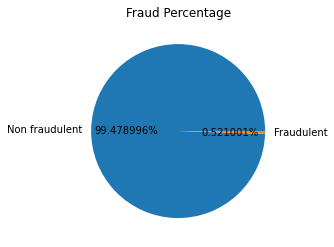

In [18]:
#Fraud percentage in the dataset
plt.pie(df_fraud["is_fraud"].value_counts(), autopct= "%2f%%", labels=["Non fraudulent","Fraudulent"])
plt.title("Fraud Percentage")
plt.show()

## This is a highly unbalanced dataset as only 0.52% of the data is fraudulent

In [19]:
df_month_trans = df_fraud.groupby(df_fraud['trans_month'])[['trans_num','cc_num']].nunique().reset_index()
df_month_trans.columns = ['trans_month','num_of_transactions','customers']
df_month_trans

,trans_month,num_of_transactions,customers
0,April,134970,919
1,August,176118,911
2,December,280598,918
3,February,97657,919
4,January,104727,916
5,July,172444,913
6,June,173869,911
7,March,143789,920
8,May,146875,917
9,November,143056,912


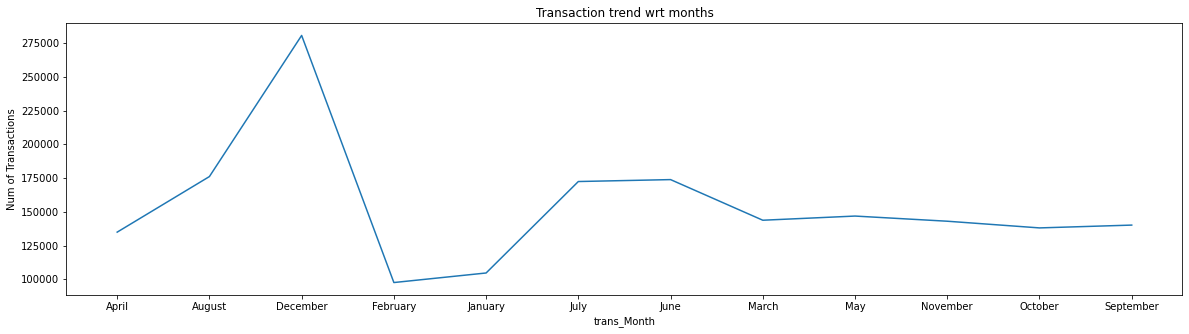

In [20]:
x = np.arange(0,len(df_month_trans),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_month_trans['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_month_trans['trans_month'])

ax.set_xlabel('trans_Month')
ax.set_ylabel('Num of Transactions')
plt.title('Transaction trend wrt months')
plt.show()

### Highest no of transaction are from the month December as its the holiday season and customers tend to purchase lots of gifts and festive season items during this time.

In [21]:
# Seprating dataset having fraud and non fraud data
df_nonfraud_new= df_fraud[df_fraud.is_fraud == 0]
df_fraud_new = df_fraud[df_fraud.is_fraud == 1]

In [103]:
df_amt_fraud= df_fraud_new.groupby(df_fraud_new['trans_month'])['amt'].sum().reset_index()
df_amt_fraud.columns=['Month','Amount']
df_amt_fraud

,Month,Amount
0,April,354241.27
1,August,412736.56
2,December,476296.22
3,February,458001.19
4,January,444375.74
5,July,347371.08
6,June,431709.34
7,March,471727.69
8,May,497775.49
9,November,353489.66


In [106]:
df_avg_amt_fraud=df_fraud_new['amt'].sum()/9651
df_avg_amt_fraud

530.661412288882

In [104]:
avg_fraud_amt_per_month= df_amt_fraud['Amount'].sum()/12
avg_fraud_amt_per_month

426784.44083333336

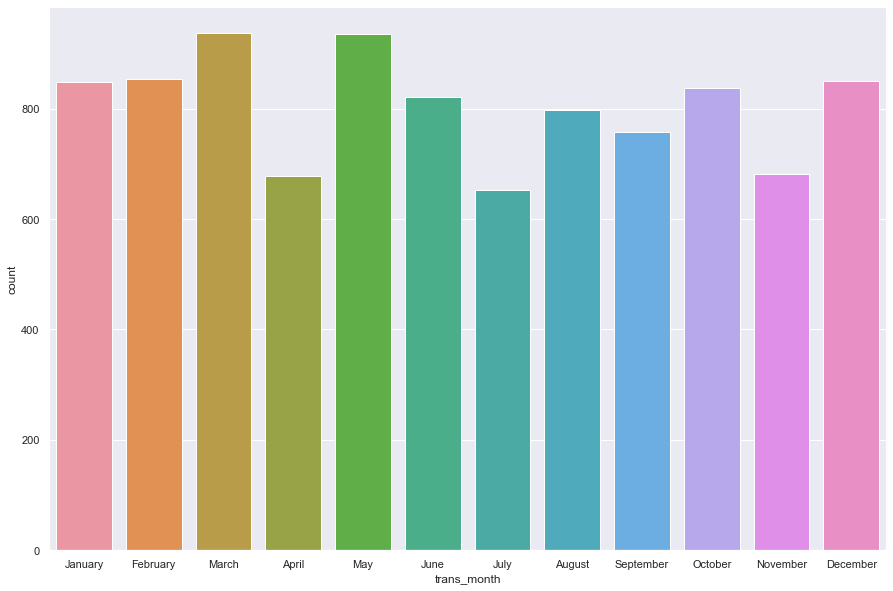

In [52]:
sns.countplot(x='trans_month', data=df_fraud_new)
sns.set(rc={'figure.figsize':(12,10)})

### Highest no of fraudulent transactions can be seen in the month of March and May followed by festive season months from December to February

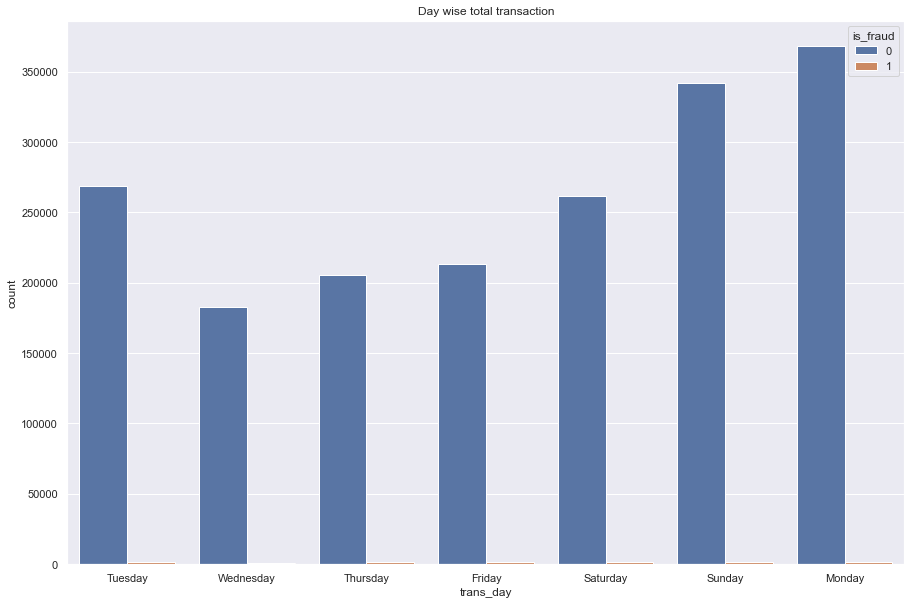

In [23]:
#Day wise total transactions
sns.countplot(x='trans_day', data=df_fraud,hue='is_fraud')
plt.title("Day wise total transaction")
sns.set(rc={'figure.figsize':(10,6)})

### Highest no of transactions can be seen on Sundays and Mondays. Sundays might be for leisure and Mondays may be because its the first day of the week so for household and grocery items

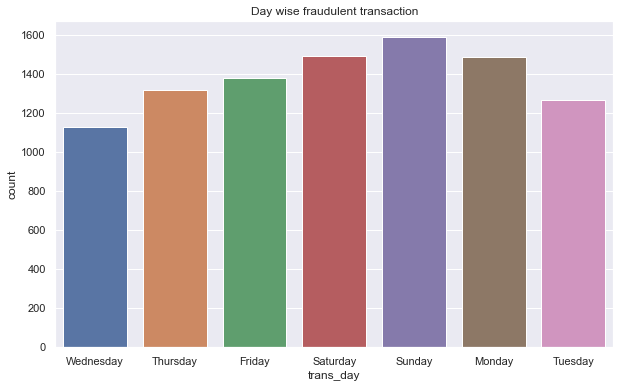

In [24]:
#Day wise fraudulent transaction
sns.countplot(x='trans_day', data=df_fraud_new,)
plt.title("Day wise fraudulent transaction")
sns.set(rc={'figure.figsize':(10,6)})

### Highest no of fraudulent transactions can be seen in weekends Sat- Sun.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


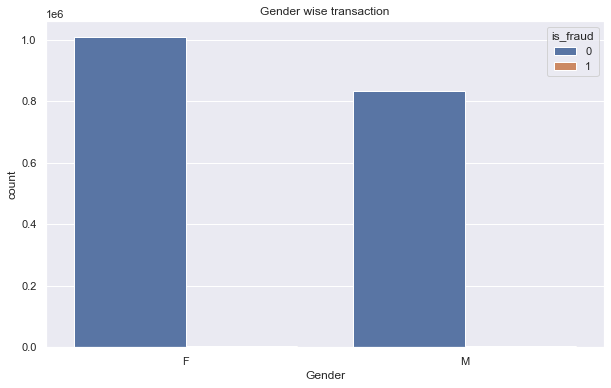

In [25]:
df_fraud_gender = df_fraud[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['count'].sum())*100

sns.barplot('Gender','count', data=df_fraud_gender, hue='is_fraud')
plt.title("Gender wise transaction")
sns.set(rc={'figure.figsize':(10,6)})

In [26]:
df_fraud_gender

,Gender,is_fraud,count,percent_grp
0,F,0,1009850,54.515940
1,F,1,4899,0.264469
2,M,0,832893,44.963059
3,M,1,4752,0.256533


### Females tends to purchase more then Males. Because of data not scaled fraudulent transactions are not seen. But we can see the % as Female fraud getting frauded is more the Males.

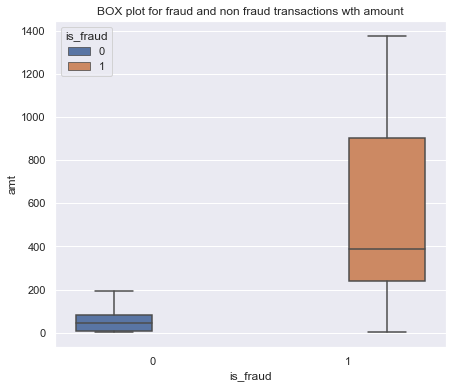

In [27]:
import seaborn as sns
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
sns.boxplot(x = 'is_fraud', y = 'amt',hue='is_fraud', data = df_fraud,showfliers=False) 
plt.title("BOX plot for fraud and non fraud transactions wth amount")
sns.set(rc={'figure.figsize':(10,6)})

### Most of the non fraudulent transactions are between $0-$200 and have less variation but on the other hand the median is nearly $400 and high value transactions

Text(0.5, 1.0, 'State wise fraud transactions')

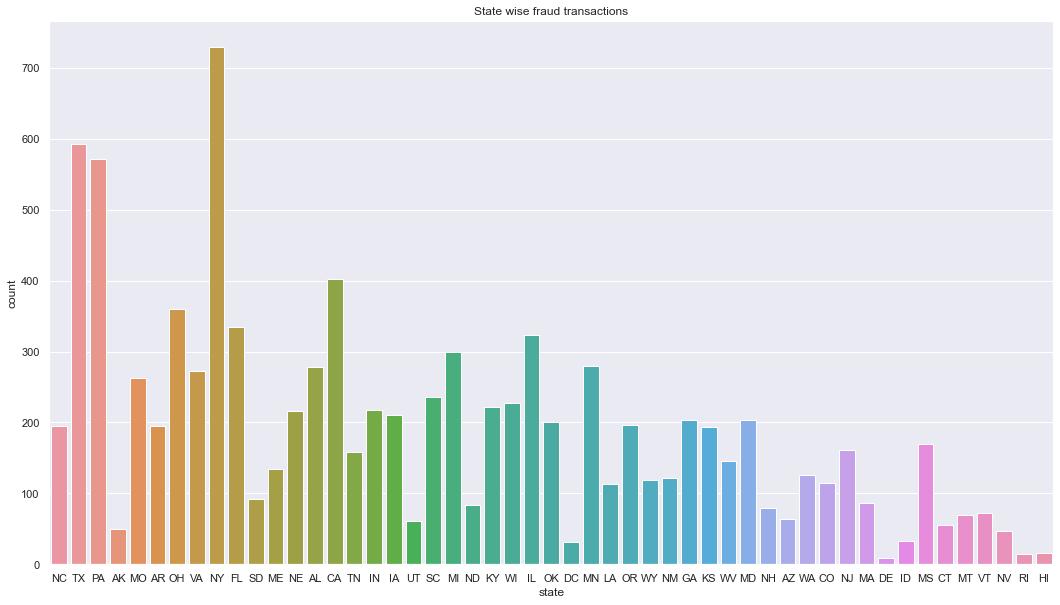

In [28]:
#State wise fraud transactions
plt.figure(figsize=(18,10))
sns.countplot(x='state', data=df_fraud_new,)
plt.title("State wise fraud transactions")


### Most of the fraudulent transactions are from NewYork followed by Texas

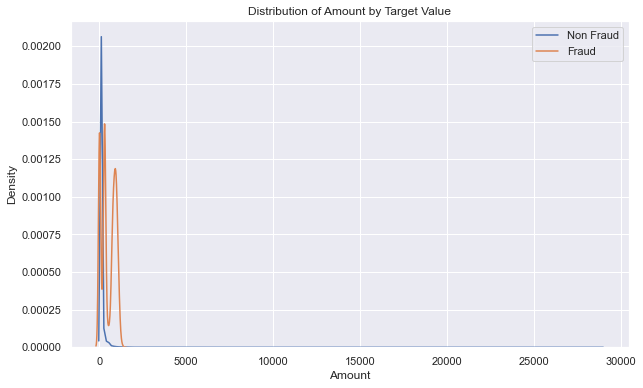

In [29]:
# KDE plot to visualize the distribution of Amount for both the classes
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(df_fraud.loc[df_fraud['is_fraud'] == 0, 'amt'], label = 'Non Fraud',)
sns.kdeplot(df_fraud.loc[df_fraud['is_fraud'] == 1, 'amt'], label = 'Fraud',)
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()

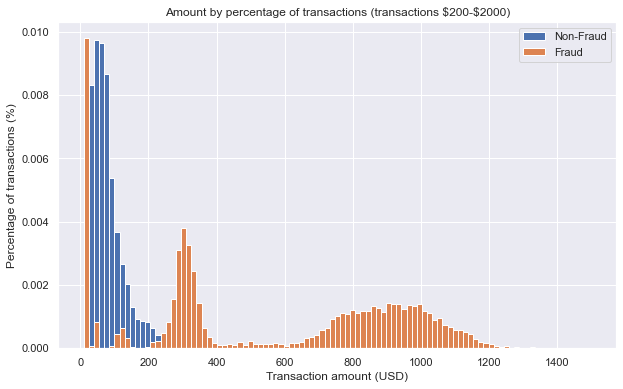

In [30]:
bins = np.linspace(10,1500 , 100)
plt.hist(df_nonfraud_new.amt, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud_new.amt, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

### we can see there is skewness in the distribution for fraud and non fraudulent transactions for amount

## Dropping irrelevant columns 

In [31]:
df_new= df_fraud.drop(['trans_date_trans_time','cc_num','merchant','category','first','last','gender','street','city','job','dob','trans_num',
                       'unix_time','city_pop','state','trans_year'], axis=1)
df_new.head()

,amt,zip,lat,long,merch_lat,merch_long,is_fraud,trans_month,trans_day,trans_time,age
0,4.97,28654,36.0788,-81.1781,36.011293,-82.048315,0,January,Tuesday,00:00:18,33
1,107.23,99160,48.8878,-118.2105,49.159047,-118.186462,0,January,Tuesday,00:00:44,43
2,220.11,83252,42.1808,-112.2620,43.150704,-112.154481,0,January,Tuesday,00:00:51,59
3,45.00,59632,46.2306,-112.1138,47.034331,-112.561071,0,January,Tuesday,00:01:16,54
4,41.96,24433,38.4207,-79.4629,38.674999,-78.632459,0,January,Tuesday,00:03:06,35


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   amt          float64
 1   zip          int64  
 2   lat          float64
 3   long         float64
 4   merch_lat    float64
 5   merch_long   float64
 6   is_fraud     int64  
 7   trans_month  object 
 8   trans_day    object 
 9   trans_time   object 
 10  age          int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 155.5+ MB


In [33]:
# Changing trans_time columns Dtype to int
df_new['trans_time']=df_new['trans_time'].apply(lambda x:int(x.strftime("%Y%m%d%H%M%S")))


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_new[['trans_month', 'trans_day']], drop_first=True)

# Adding the results to the master dataframe
df_new= pd.concat([df_new, dummy1], axis=1)


In [35]:
# Dropping trans_month and trans_day columns
df_new=df_new.drop(['trans_month','trans_day'],1)
df_new.head(2)

,amt,zip,lat,long,merch_lat,merch_long,is_fraud,trans_time,age,trans_month_August,...,trans_month_May,trans_month_November,trans_month_October,trans_month_September,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday
0,4.97,28654,36.0788,-81.1781,36.011293,-82.048315,0,19000101000018,33,0,...,0,0,0,0,0,0,0,0,1,0
1,107.23,99160,48.8878,-118.2105,49.159047,-118.186462,0,19000101000044,43,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   amt                    float64
 1   zip                    int64  
 2   lat                    float64
 3   long                   float64
 4   merch_lat              float64
 5   merch_long             float64
 6   is_fraud               int64  
 7   trans_time             int64  
 8   age                    int64  
 9   trans_month_August     uint8  
 10  trans_month_December   uint8  
 11  trans_month_February   uint8  
 12  trans_month_January    uint8  
 13  trans_month_July       uint8  
 14  trans_month_June       uint8  
 15  trans_month_March      uint8  
 16  trans_month_May        uint8  
 17  trans_month_November   uint8  
 18  trans_month_October    uint8  
 19  trans_month_September  uint8  
 20  trans_day_Monday       uint8  
 21  trans_day_Saturday     uint8  
 22  trans_day_Sunday  

In [37]:
#Separating Target variable
y=df_new['is_fraud']
X= df_new.drop(['is_fraud'],axis=1)

### Checking Correlation

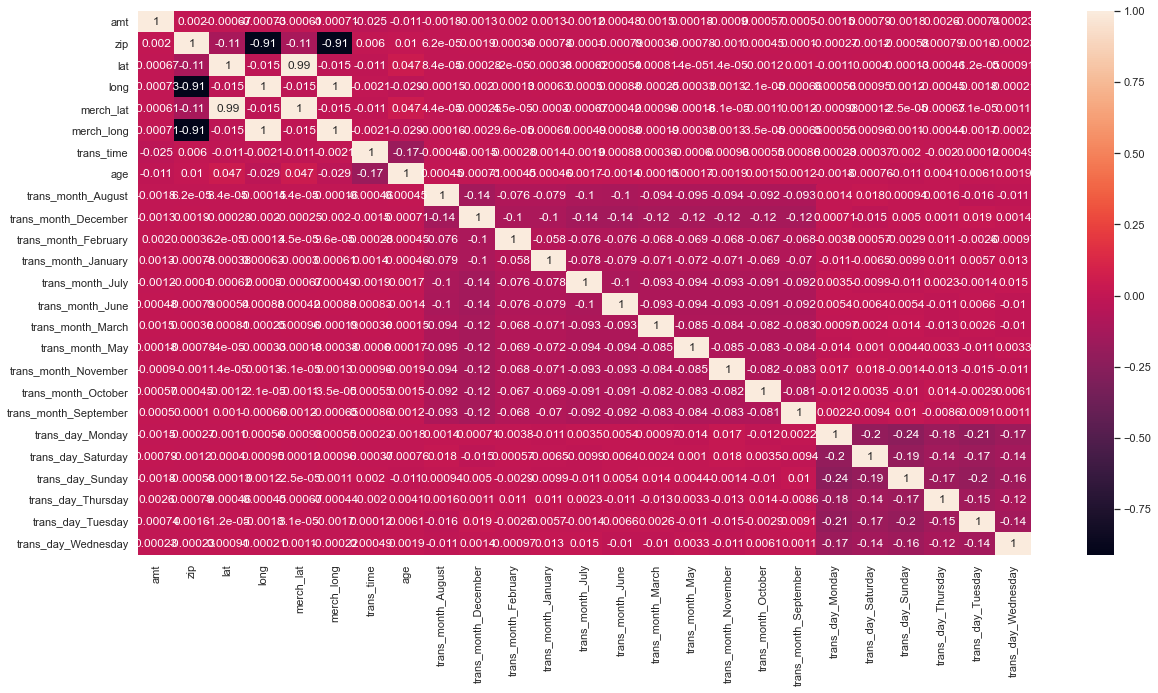

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot = True)
plt.show()

### Data is not correlated

## Checking skewness and transforming 

In [39]:
# As from the previous graphs we can see that the data is highly skewed. Transaforming to more Gaussian
pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


## Train Test Split using Stratified shuffle split

In [40]:
# Splitting dataset into test and train sets in 70:30 ratio after applying Power Transform

kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(PWTR_X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = PWTR_X[train_index], PWTR_X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [  57069  838396  688060 ... 1066144 1822938  975777] TEST: [1626641  635788 1578834 ... 1563963  230680  665720]
TRAIN: [ 529069  655055  682080 ... 1521527 1122527  448594] TEST: [ 996172  545281 1052862 ...  396678  257474  197566]
TRAIN: [1272124  745131  810506 ... 1790848  592020  949275] TEST: [ 181895 1004681 1791522 ...  983349  910421  493913]
TRAIN: [1536019 1644162 1772879 ...  330308  637828  480670] TEST: [ 616888  300916 1261448 ... 1318404 1515881  998529]


# Model Building

### Model Evaluation

In [45]:
# Evaluation Metrics
def evaluate_model(y_pred):
    
    CM=confusion_matrix(y_true = y_test, y_pred = y_pred)
    print('Classification report:\n', classification_report(y_test, y_pred))
    print('Confusion matrix:\n',CM)
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print('ROC AUC : ', roc_auc_score(y_test, y_pred))
    print('Precision : ', precision_score(y_test, y_pred))
    print('Recall : ', recall_score(y_test, y_pred))

    #TP = CM[1,1] # true positive 
    #TN = CM[0,0] # true negatives
    #FP = CM[0,1] # false positives
    #FN = CM[1,0] # false negatives
    #print('Precision : ', TP/(FP+TP))
    #print('Recall : ',TP/(TP+FN))

## Balancing data set using Random Over Sampling, SMOTE and ADASYN

In [42]:
# Resample training data
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_adasyn, y_train_adasyn =adasyn.fit_sample(X_train,y_train)

## Logistic Regression

### Model 1: Logistic regression model using ROS

In [43]:
# Fit a logistic regression model using ROS
model_lr = LogisticRegression()
model_lr.fit(X_train_ros, y_train_ros)

# Obtain model predictions
lr_predicted_ros = model_lr.predict(X_test)

In [46]:
evaluate_model(lr_predicted_ros)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    552824
           1       0.02      0.78      0.04      2895

    accuracy                           0.83    555719
   macro avg       0.51      0.80      0.48    555719
weighted avg       0.99      0.83      0.90    555719

Confusion matrix:
 [[457875  94949]
 [   644   2251]]
Accuracy:  0.8279832073404004
ROC AUC :  0.8028974110684616
Precision :  0.02315843621399177
Recall :  0.7775474956822107


In [47]:
# Function for roc_curve
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

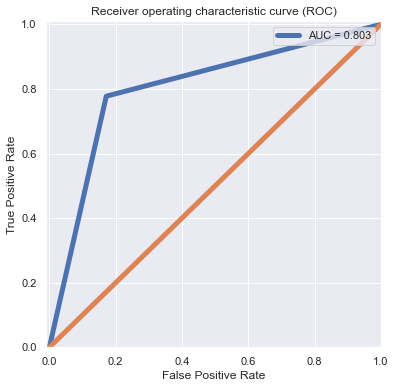

In [180]:
#ROC curve visualization for Logistic model using ROS
fpr, tpr, threshold = roc_curve(y_test, lr_predicted_ros)
roc_auc = roc_auc_score(y_test, lr_predicted_ros)
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 2: Hyper parameter tuning on Logistic regression model using ROS

In [56]:
# Parameters for hypertuning for Logestic Regression model
params_lr = { 
               'C': [0.1, 0.5, 1, 2, 5, 10], 
               'penalty': ['l1', 'l2']
            }

In [57]:
# Using StratifiedKFold for cross validation with 3 splits
cross_val = StratifiedKFold(n_splits=3)
# Instantiate the grid search model

grid_search = GridSearchCV(estimator=model_lr, 
                           param_grid=params_lr, 
                           cv=cross_val, n_jobs=-1, verbose=1, scoring = 'precision')

In [61]:
# Fitting ROS train dataset in GridSearchCV for cross validtion

grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10], 'penalty': ['l1', 'l2']},
             scoring='precision', verbose=1)

In [62]:
#Best estimator for ROS
lr_best_ros= grid_search.best_estimator_

In [156]:
#Evaluating Best Logistic regression model using ROS on test dataset
evaluate_model(lr_best_ros.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    552824
           1       0.02      0.78      0.05      2895

    accuracy                           0.83    555719
   macro avg       0.51      0.80      0.48    555719
weighted avg       0.99      0.83      0.90    555719

Confusion matrix:
 [[457941  94883]
 [   644   2251]]
Accuracy:  0.82810197239972
ROC AUC :  0.8029571045694673
Precision :  0.02317417176271954
Recall :  0.7775474956822107


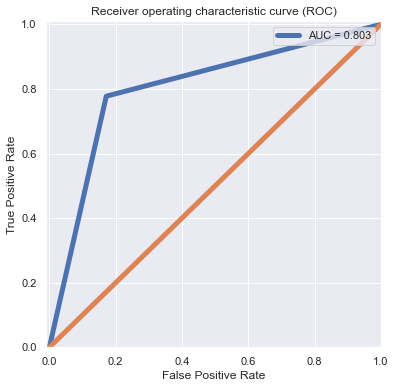

In [181]:
#ROC curve visualization for Logistic model using ROS Hyperparameter tuned
fpr, tpr, threshold = roc_curve(y_test, lr_best_ros.predict(X_test))
roc_auc = roc_auc_score(y_test, lr_best_ros.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 3: Logistic Resgression model using SMOTE 

In [48]:
# Fit a logistic regression model using SMOTE
model_lr.fit(X_train_smote, y_train_smote)

# Obtain model predictions
lr_predicted_smote = model_lr.predict(X_test)

In [49]:
evaluate_model(lr_predicted_smote)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91    552824
           1       0.02      0.78      0.05      2895

    accuracy                           0.84    555719
   macro avg       0.51      0.81      0.48    555719
weighted avg       0.99      0.84      0.91    555719

Confusion matrix:
 [[464044  88780]
 [   649   2246]]
Accuracy:  0.839075144092608
ROC AUC :  0.8076133866601525
Precision :  0.024674268890207192
Recall :  0.7758203799654577


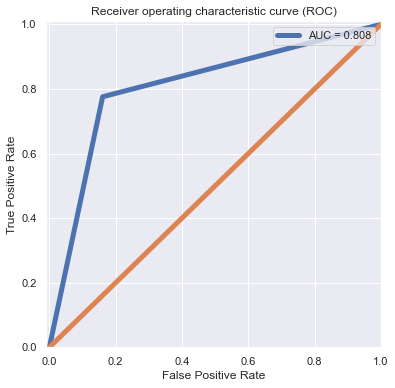

In [50]:
#ROC curve visualization for Logistic model using SMOTE
fpr, tpr, threshold = roc_curve(y_test, lr_predicted_smote)
roc_auc = roc_auc_score(y_test, lr_predicted_smote)
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 4:  Hyper parameter tuning on Logistic regression model using SMOTE

In [67]:
# Fitting SMOTE train dataset in GridSearchCV for cross validtion

grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10], 'penalty': ['l1', 'l2']},
             scoring='precision', verbose=1)

In [68]:
#Best estimator for SMOTE
lr_best_smote= grid_search.best_estimator_

In [158]:
#Evaluating Best Logistic regression model using SMOTE on test dataset
evaluate_model(lr_best_smote.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91    552824
           1       0.02      0.78      0.05      2895

    accuracy                           0.84    555719
   macro avg       0.51      0.81      0.48    555719
weighted avg       0.99      0.84      0.91    555719

Confusion matrix:
 [[464038  88786]
 [   649   2246]]
Accuracy:  0.8390643472690335
ROC AUC :  0.8076079599782429
Precision :  0.024672642587222075
Recall :  0.7758203799654577


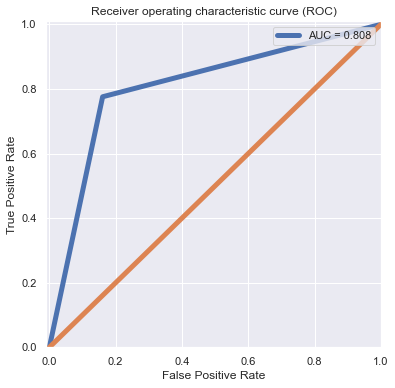

In [187]:
#ROC curve visualization for Logistic model using SMOTE Hyperparameter tuned
fpr, tpr, threshold = roc_curve(y_test, lr_best_smote.predict(X_test))
roc_auc = roc_auc_score(y_test, lr_best_smote.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 5: Logistic Resgression model using ADASYN

In [53]:
# Fit a logistic regression model using ADASYN
model_lr.fit(X_train_adasyn, y_train_adasyn)

# Obtain model predictions
lr_predicted_adasyn = model_lr.predict(X_test)

In [54]:
evaluate_model(lr_predicted_adasyn)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87    552824
           1       0.02      0.78      0.03      2895

    accuracy                           0.77    555719
   macro avg       0.51      0.78      0.45    555719
weighted avg       0.99      0.77      0.87    555719

Confusion matrix:
 [[427937 124887]
 [   643   2252]]
Accuracy:  0.7741124561154108
ROC AUC :  0.775992788805137
Precision :  0.01771289690810845
Recall :  0.7778929188255613


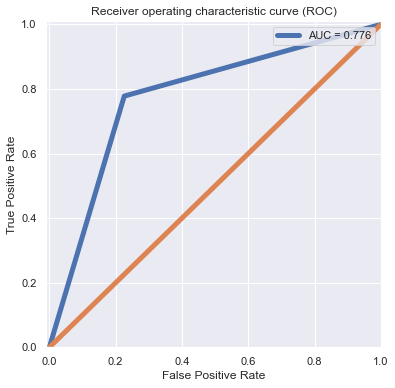

In [55]:
#ROC curve visualization for Logistic model using ADASYN
fpr, tpr, threshold = roc_curve(y_test, lr_predicted_adasyn)
roc_auc = roc_auc_score(y_test, lr_predicted_adasyn)
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 6: Hyper parameter tuning on Logistic regression model using ADASYN

In [72]:
# Fitting ADASYN train dataset in GridSearchCV for cross validtion

grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10], 'penalty': ['l1', 'l2']},
             scoring='precision', verbose=1)

In [73]:
#Best estimator for adasyn
lr_best_adasyn= grid_search.best_estimator_

In [160]:
#Evaluating Best Logistic regression model using ADASYN on test dataset
evaluate_model(lr_best_adasyn.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87    552824
           1       0.02      0.78      0.03      2895

    accuracy                           0.77    555719
   macro avg       0.51      0.78      0.45    555719
weighted avg       0.99      0.77      0.87    555719

Confusion matrix:
 [[427945 124879]
 [   643   2252]]
Accuracy:  0.7741268518801768
ROC AUC :  0.7760000243810166
Precision :  0.01771401153141248
Recall :  0.7778929188255613


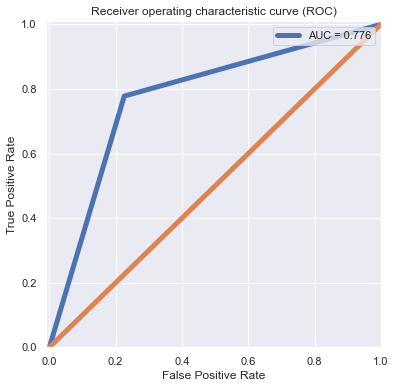

In [192]:
#ROC curve visualization for Logistic model using ADASYN
fpr, tpr, threshold = roc_curve(y_test, lr_best_adasyn.predict(X_test))
roc_auc = roc_auc_score(y_test, lr_best_adasyn.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

## Decision Tree 

### Model 7: Decision Tree model using ROS

In [56]:
dt_ros = DecisionTreeClassifier(random_state=42)
dt_ros.fit(X_train_ros, y_train_ros)
dt_predicted_ros= dt_ros.predict(X_test)

In [57]:
# Evaluation Metrics for DT on ROS
evaluate_model(dt_predicted_ros)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.40      0.38      0.39      2895

    accuracy                           0.99    555719
   macro avg       0.70      0.69      0.69    555719
weighted avg       0.99      0.99      0.99    555719

Confusion matrix:
 [[551174   1650]
 [  1806   1089]]
Accuracy:  0.9937810296210855
ROC AUC :  0.6865905640292606
Precision :  0.39759036144578314
Recall :  0.3761658031088083


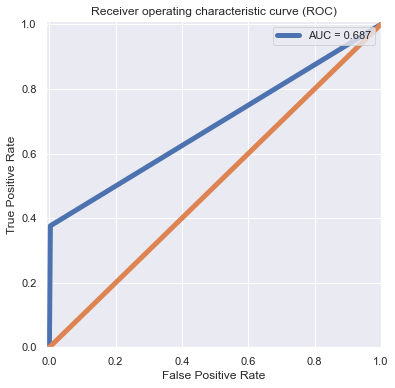

In [58]:
#ROC curve visualization for Decision tree model using ROS
fpr, tpr, threshold = roc_curve(y_test, dt_ros.predict(X_test))
roc_auc = roc_auc_score(y_test, dt_ros.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 8: Hyper parameter tuning on Decision Tree model using ROS

In [172]:
#Parameters for hyper parameter tuning on Decision Tree
params = { 'min_samples_leaf': [1000,5000],
    'max_depth' : [5,7,9],
    'criterion' :['gini', 'entropy']
}

In [173]:
# Instantiate the grid search model

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=cross_val, n_jobs=-1, verbose=1, scoring = "precision")

In [174]:
# Fitting train data on ROS for cross validation

grid_search.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'min_samples_leaf': [1000, 5000]},
             scoring='precision', verbose=1)

In [81]:
dt_best_ros=grid_search.best_estimator_

In [162]:
# Evaluating best DT model using ROS
evaluate_model(dt_best_ros.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97    552824
           1       0.06      0.84      0.12      2895

    accuracy                           0.93    555719
   macro avg       0.53      0.89      0.54    555719
weighted avg       0.99      0.93      0.96    555719

Confusion matrix:
 [[516787  36037]
 [   474   2421]]
Accuracy:  0.9342995290785451
ROC AUC :  0.885541159029785
Precision :  0.06295179156482396
Recall :  0.8362694300518134


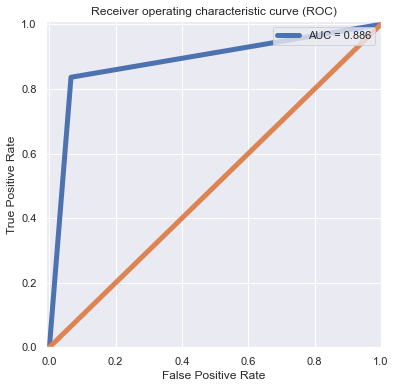

In [194]:
#ROC curve visualization for Decision tree model using ROS Hyperparameter tuned
fpr, tpr, threshold = roc_curve(y_test, dt_best_ros.predict(X_test))
roc_auc = roc_auc_score(y_test, dt_best_ros.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 9: Decision Tree model using SMOTE

In [60]:
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)
dt_predicted_smote= dt_smote.predict(X_test)

In [61]:
# Evaluation Metrics
evaluate_model(dt_predicted_smote)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    552824
           1       0.19      0.65      0.30      2895

    accuracy                           0.98    555719
   macro avg       0.59      0.82      0.64    555719
weighted avg       0.99      0.98      0.99    555719

Confusion matrix:
 [[544822   8002]
 [  1004   1891]]
Accuracy:  0.9837939678146689
ROC AUC :  0.8193601972645423
Precision :  0.19114525422015566
Recall :  0.6531951640759931


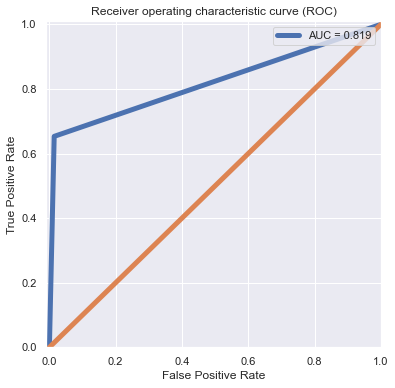

In [62]:
#ROC curve visualization for Decision tree model using SMOTE 
fpr, tpr, threshold = roc_curve(y_test, dt_smote.predict(X_test))
roc_auc = roc_auc_score(y_test, dt_smote.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 10:  Hyper parameter tuning on Decision Tree model using SMOTE

In [85]:
# Fitting train data on SMOTE for cross validation

grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'min_samples_leaf': [1000, 5000]},
             scoring='precision', verbose=1)

In [86]:
dt_best_smote=grid_search.best_estimator_

In [164]:
# Evaluating best DT model using SMOTE
evaluate_model(dt_best_smote.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    552824
           1       0.05      0.87      0.09      2895

    accuracy                           0.91    555719
   macro avg       0.52      0.89      0.52    555719
weighted avg       0.99      0.91      0.95    555719

Confusion matrix:
 [[503626  49198]
 [   390   2505]]
Accuracy:  0.9107678520979128
ROC AUC :  0.8881455042817739
Precision :  0.04844979981819237
Recall :  0.8652849740932642


In [ ]:
#ROC curve visualization for Decision tree model using SMOTE Hyper parameter tuned
fpr, tpr, threshold = roc_curve(y_test, dt_best_smote.predict(X_test))
roc_auc = roc_auc_score(y_test, dt_best_smote.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 11: Decision Tree model using ADASYN

In [63]:
dt_adasyn = DecisionTreeClassifier(random_state=42)
dt_adasyn.fit(X_train_adasyn, y_train_adasyn)
dt_predicted_adasyn= dt_adasyn.predict(X_test)

In [64]:
# Evaluation Metrics
evaluate_model(dt_predicted_adasyn)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    552824
           1       0.18      0.64      0.28      2895

    accuracy                           0.98    555719
   macro avg       0.59      0.81      0.64    555719
weighted avg       0.99      0.98      0.99    555719

Confusion matrix:
 [[544361   8463]
 [  1041   1854]]
Accuracy:  0.982897831457985
ROC AUC :  0.8125529190525009
Precision :  0.17970340215178832
Recall :  0.6404145077720207


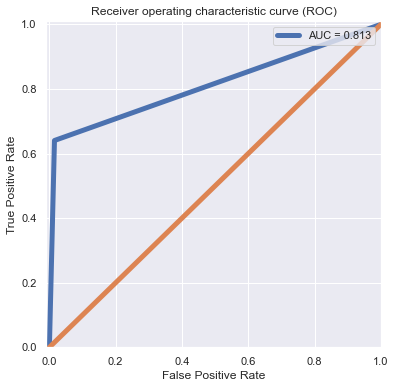

In [65]:
#ROC curve visualization for Decision tree model using ADASYN
fpr, tpr, threshold = roc_curve(y_test, dt_adasyn.predict(X_test))
roc_auc = roc_auc_score(y_test, dt_adasyn.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 12: Hyper parameter tuning on Decision Tree model using ADASYN

In [90]:
# Fitting train data on ADASYN for cross validation

grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'min_samples_leaf': [1000, 5000]},
             scoring='precision', verbose=1)

In [91]:
dt_best_adasyn=grid_search.best_estimator_

In [166]:
# Evaluating best DT model using ADASYN
evaluate_model(dt_best_adasyn.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    552824
           1       0.04      0.88      0.08      2895

    accuracy                           0.89    555719
   macro avg       0.52      0.89      0.51    555719
weighted avg       0.99      0.89      0.94    555719

Confusion matrix:
 [[493582  59242]
 [   349   2546]]
Accuracy:  0.8927677477286182
ROC AUC :  0.8861424132037687
Precision :  0.04120541205412054
Recall :  0.879447322970639


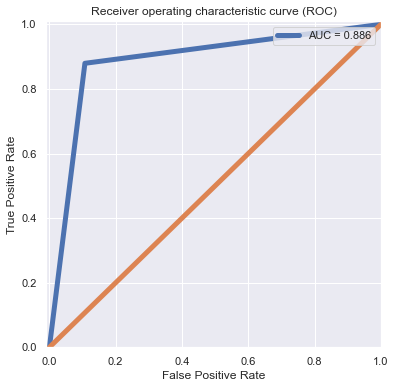

In [197]:
#ROC curve visualization for Decision tree model using ADASYN Hypertuned
fpr, tpr, threshold = roc_curve(y_test, dt_best_adasyn.predict(X_test))
roc_auc = roc_auc_score(y_test, dt_best_adasyn.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

# Random Forest


### Model 13: Random Forest model using ROS

In [66]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=10,
                             verbose=False)

In [67]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_ros,y_train_ros)


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=2018,
                       verbose=False)

In [68]:
rf_predicted_ros = model_rfc.predict(X_test)
evaluate_model(rf_predicted_ros)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.84      0.50      0.63      2895

    accuracy                           1.00    555719
   macro avg       0.92      0.75      0.81    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[552555    269]
 [  1453   1442]]
Accuracy:  0.9969013116341172
ROC AUC :  0.7488067901168382
Precision :  0.842781998831093
Recall :  0.4981001727115717


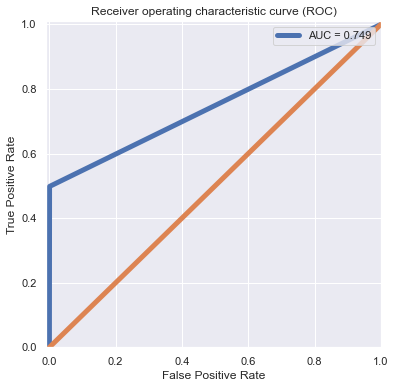

In [69]:
#ROC curve visualization for Random forest model using ROS
fpr, tpr, threshold = roc_curve(y_test, model_rfc.predict(X_test))
roc_auc = roc_auc_score(y_test, model_rfc.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 14: Random Forest model using SMOTE

In [70]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_smote,y_train_smote)


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=2018,
                       verbose=False)

In [71]:
rf_predicted_smote = model_rfc.predict(X_test)
evaluate_model(rf_predicted_smote)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.49      0.67      0.56      2895

    accuracy                           0.99    555719
   macro avg       0.74      0.83      0.78    555719
weighted avg       1.00      0.99      1.00    555719

Confusion matrix:
 [[550796   2028]
 [   964   1931]]
Accuracy:  0.9946159839775138
ROC AUC :  0.8316718264195595
Precision :  0.48774943167466533
Recall :  0.6670120898100173


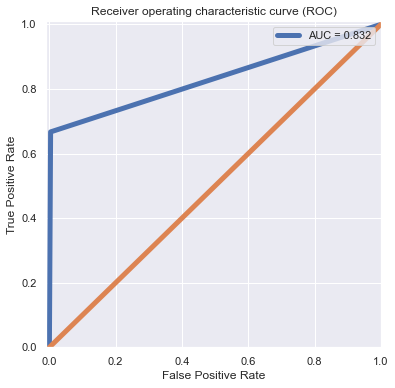

In [72]:
#ROC curve visualization for Random forest model using SMOTE
fpr, tpr, threshold = roc_curve(y_test, rf_predicted_smote)
roc_auc = roc_auc_score(y_test, rf_predicted_smote)
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 15: Random Forest model using ADASYN

In [73]:
# Fit the model on train data and predict on test data 
model_rfc.fit(X_train_adasyn,y_train_adasyn)
rf_predicted_adasyn = model_rfc.predict(X_test)

In [74]:
evaluate_model(rf_predicted_adasyn)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.47      0.68      0.56      2895

    accuracy                           0.99    555719
   macro avg       0.74      0.84      0.78    555719
weighted avg       1.00      0.99      0.99    555719

Confusion matrix:
 [[550623   2201]
 [   926   1969]]
Accuracy:  0.9943730554470874
ROC AUC :  0.838078396814827
Precision :  0.47218225419664267
Recall :  0.6801381692573403


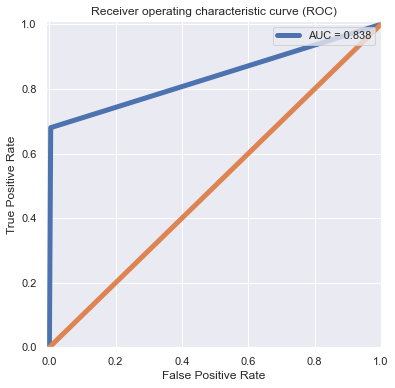

In [75]:
#ROC curve visualization for Random forest model using ADASYN
fpr, tpr, threshold = roc_curve(y_test,rf_predicted_adasyn)
roc_auc = roc_auc_score(y_test, rf_predicted_adasyn)
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 16: Hyper parameter tuning on Random Forest model using ROS 

In [100]:
params = { 

    'n_estimators':[150,200],
    'max_depth' : [5,7,9],
    'criterion' :['gini', 'entropy']
}
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [101]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=3, n_jobs=-1, scoring = "precision")

In [102]:

grid_search.fit(X_train_ros,y_train_ros)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9], 'n_estimators': [150, 200]},
             scoring='precision')

In [103]:
rf_best_ros=grid_search.best_estimator_


In [104]:
evaluate_model(rf_best_ros.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.13      0.77      0.23      2895

    accuracy                           0.97    555719
   macro avg       0.57      0.87      0.61    555719
weighted avg       0.99      0.97      0.98    555719

Confusion matrix:
 [[538534  14290]
 [   674   2221]]
Accuracy:  0.973072722005186
ROC AUC :  0.8706678532761174
Precision :  0.13451638301738236
Recall :  0.7671848013816925


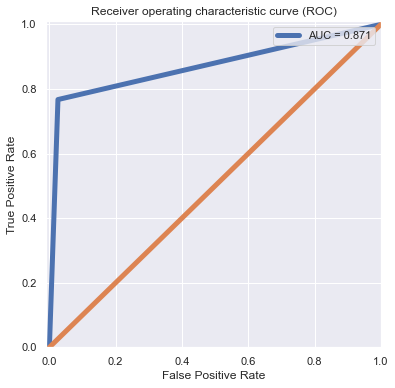

In [203]:
#ROC curve visualization for Random forest model using ROS Hyper parameter tuned
fpr, tpr, threshold = roc_curve(y_test,rf_best_ros.predict(X_test))
roc_auc = roc_auc_score(y_test, rf_best_ros.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 17: Hyper parameter tuning on Random Forest model using SMOTE

In [105]:

grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9], 'n_estimators': [150, 200]},
             scoring='precision')

In [106]:
rf_best_smote=grid_search.best_estimator_

In [107]:
evaluate_model(rf_best_smote.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.14      0.76      0.23      2895

    accuracy                           0.97    555719
   macro avg       0.57      0.87      0.61    555719
weighted avg       0.99      0.97      0.98    555719

Confusion matrix:
 [[538750  14074]
 [   688   2207]]
Accuracy:  0.9734362150655277
ROC AUC :  0.8684452518214094
Precision :  0.13555678398132792
Recall :  0.7623488773747841


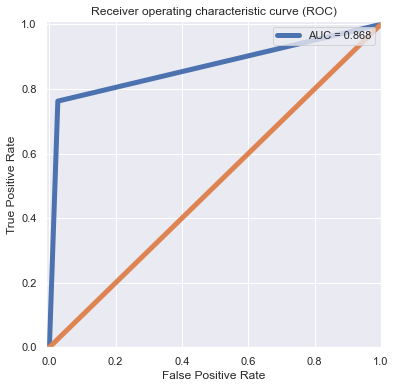

In [205]:
#ROC curve visualization for Random forest model using SMOTE Hyper parameter tuned
fpr, tpr, threshold = roc_curve(y_test,rf_best_smote.predict(X_test))
roc_auc = roc_auc_score(y_test, rf_best_smote.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 18: Hyper parameter tuning on Random Forest model using ADASYN

In [108]:

grid_search.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9], 'n_estimators': [150, 200]},
             scoring='precision')

In [109]:
rf_best_adasyn=grid_search.best_estimator_

In [110]:
evaluate_model(rf_best_adasyn.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.13      0.76      0.22      2895

    accuracy                           0.97    555719
   macro avg       0.56      0.87      0.60    555719
weighted avg       0.99      0.97      0.98    555719

Confusion matrix:
 [[538313  14511]
 [   702   2193]]
Accuracy:  0.9726246538268442
ROC AUC :  0.8656320464855384
Precision :  0.1312859195402299
Recall :  0.7575129533678756


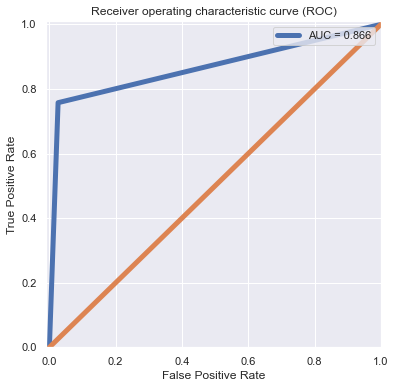

In [247]:
#ROC curve visualization for Random forest model using ADASYN Hyper parameter tuned
fpr, tpr, threshold = roc_curve(y_test,rf_best_adasyn.predict(X_test))
roc_auc = roc_auc_score(y_test,rf_best_adasyn.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

# XGBOOST

### Model 19: XGBoost model using ROS

In [76]:
model_xgb_ros = XGBClassifier()

In [77]:
#Fit the model on train data and predict the model on test data
model_xgb_ros.fit(X_train_ros,y_train_ros)
xgb_predicted_ros = model_xgb_ros.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
evaluate_model(xgb_predicted_ros)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    552824
           1       0.09      0.86      0.15      2895

    accuracy                           0.95    555719
   macro avg       0.54      0.91      0.56    555719
weighted avg       0.99      0.95      0.97    555719

Confusion matrix:
 [[526050  26774]
 [   407   2488]]
Accuracy:  0.9510885897368994
ROC AUC :  0.9054907267534881
Precision :  0.08502494703027817
Recall :  0.859412780656304


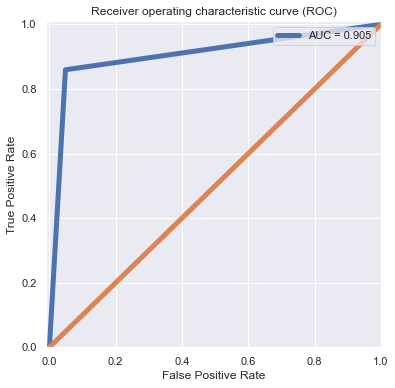

In [79]:
#ROC curve visualization for XGB model using ROS
fpr, tpr, threshold = roc_curve(y_test,model_xgb_ros.predict(X_test))
roc_auc = roc_auc_score(y_test,model_xgb_ros.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 20: XGBoost model using SMOTE

In [80]:
model_xgb_smote= XGBClassifier()
model_xgb_smote.fit(X_train_smote,y_train_smote)
xgb_predicted_smote = model_xgb_smote.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
evaluate_model(xgb_predicted_smote)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    552824
           1       0.14      0.80      0.24      2895

    accuracy                           0.97    555719
   macro avg       0.57      0.89      0.61    555719
weighted avg       0.99      0.97      0.98    555719

Confusion matrix:
 [[538483  14341]
 [   588   2307]]
Accuracy:  0.9731357034760374
ROC AUC :  0.8854749216439618
Precision :  0.13857520422873618
Recall :  0.7968911917098446


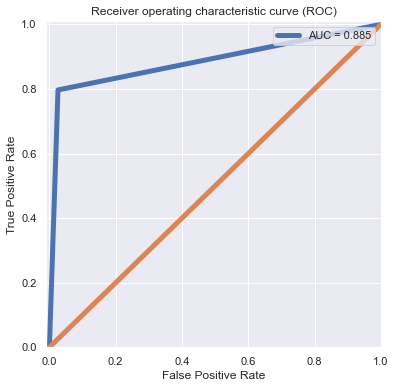

In [82]:
#ROC curve visualization for XGB model using SMOTE
fpr, tpr, threshold = roc_curve(y_test,model_xgb_smote.predict(X_test))
roc_auc = roc_auc_score(y_test,model_xgb_smote.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 21: XGBoost model using ADASYN

In [83]:
model_xgb_adasyn= XGBClassifier()
model_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
xgb_predicted_adasyn = model_xgb_adasyn.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
evaluate_model(xgb_predicted_adasyn)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    552824
           1       0.12      0.81      0.21      2895

    accuracy                           0.97    555719
   macro avg       0.56      0.89      0.60    555719
weighted avg       0.99      0.97      0.98    555719

Confusion matrix:
 [[536069  16755]
 [   559   2336]]
Accuracy:  0.9688439661051719
ROC AUC :  0.8883002222009113
Precision :  0.12236132208894243
Recall :  0.8069084628670121


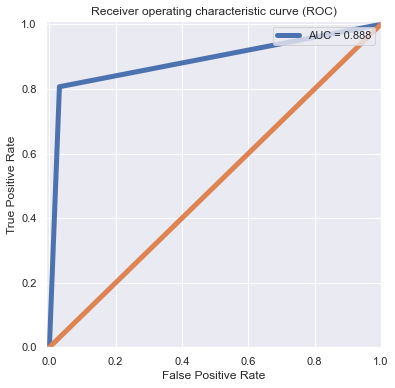

In [85]:
#ROC curve visualization for XGB model using ADASYN
fpr, tpr, threshold = roc_curve(y_test,model_xgb_adasyn.predict(X_test))
roc_auc = roc_auc_score(y_test,model_xgb_adasyn.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 22: Hyper parameter tuning on XGBoost model using ROS

In [118]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [5, 10],
        'gamma': [0.5, 1],
        'max_depth': [5,7]
        }

In [119]:

cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train_ros, y_train_ros)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 

In [120]:
grid_search = GridSearchCV(estimator=xgb_cross, param_grid=params, 
                          cv=3, n_jobs=-1, scoring = "precision")

In [121]:

grid_search.fit(X_train_ros, y_train_ros)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:25:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.02, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale

In [122]:
xgb_best_ros=grid_search.best_estimator_

In [123]:
evaluate_model(xgb_best_ros.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    552824
           1       0.05      0.88      0.10      2895

    accuracy                           0.91    555719
   macro avg       0.52      0.90      0.52    555719
weighted avg       0.99      0.91      0.95    555719

Confusion matrix:
 [[504957  47867]
 [   350   2545]]
Accuracy:  0.913234926284687
ROC AUC :  0.8962577860857353
Precision :  0.05048401174323574
Recall :  0.8791018998272885


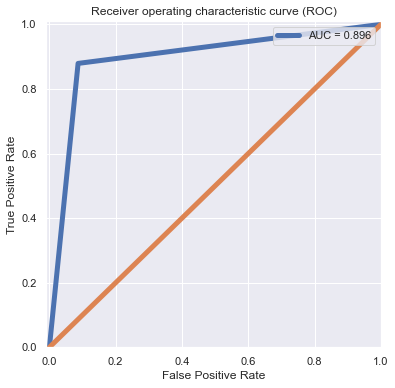

In [208]:
#ROC curve visualization for XGB model using ROS Hyperparameter tuned
fpr, tpr, threshold = roc_curve(y_test,xgb_best_ros.predict(X_test))
roc_auc = roc_auc_score(y_test,xgb_best_ros.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 23: Hyper parameter tuning on XGBoost model using SMOTE

In [124]:

grid_search.fit(X_train_smote, y_train_smote)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:55:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.02, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale

In [125]:
xgb_best_smote=grid_search.best_estimator_

In [126]:
evaluate_model(xgb_best_smote.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    552824
           1       0.04      0.88      0.09      2895

    accuracy                           0.90    555719
   macro avg       0.52      0.89      0.52    555719
weighted avg       0.99      0.90      0.94    555719

Confusion matrix:
 [[498747  54077]
 [   352   2543]]
Accuracy:  0.9020566149438836
ROC AUC :  0.8902957471659348
Precision :  0.04491345814199929
Recall :  0.8784110535405872


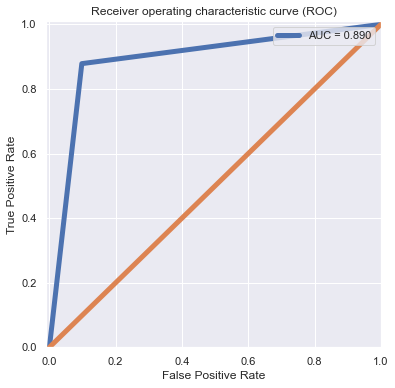

In [209]:
#ROC curve visualization for XGB model using SMOTE Hyperparameter tuned
fpr, tpr, threshold = roc_curve(y_test,xgb_best_smote.predict(X_test))
roc_auc = roc_auc_score(y_test,xgb_best_smote.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### Model 24: Hyper parameter tuning on XGBoost model using ADASYN

In [127]:

grid_search.fit(X_train_adasyn, y_train_adasyn)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:20:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.02, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale

In [128]:
xgb_best_adasyn=grid_search.best_estimator_

In [129]:
evaluate_model(xgb_best_adasyn.predict(X_test))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94    552824
           1       0.04      0.90      0.07      2895

    accuracy                           0.88    555719
   macro avg       0.52      0.89      0.51    555719
weighted avg       0.99      0.88      0.93    555719

Confusion matrix:
 [[487947  64877]
 [   286   2609]]
Accuracy:  0.8827410975690951
ROC AUC :  0.8919266834592011
Precision :  0.03865987019529977
Recall :  0.9012089810017271


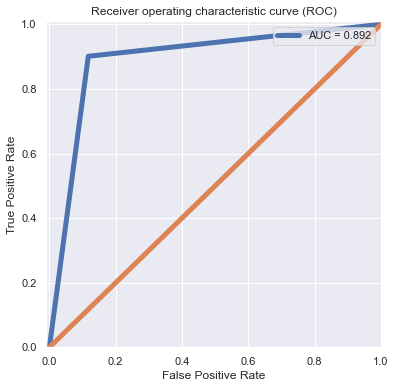

In [210]:
#ROC curve visualization for XGB model using ADASYN Hyperparameter tuned
fpr, tpr, threshold = roc_curve(y_test, xgb_best_adasyn.predict(X_test))
roc_auc = roc_auc_score(y_test, xgb_best_adasyn.predict(X_test))
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

# Final Analysis

### Best Model considering various parameters and scenario

Rather than aiming for overall accuracy on the entire dataset, we cared more about detecting most of the fraud cases (recall), whilst keeping the cost at which this is achieved under control (precision).We have applied Random Forest on Smote data and got the best evaluation metrices.

In [239]:
#Evaluate Metrics for Random Forest on SMOTE
rf_predicted_smote = model_rfc.predict(X_test)
evaluate_model(rf_predicted_smote)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.47      0.68      0.56      2895

    accuracy                           0.99    555719
   macro avg       0.74      0.84      0.78    555719
weighted avg       1.00      0.99      0.99    555719

Confusion matrix:
 [[550623   2201]
 [   926   1969]]
Accuracy:  0.9943730554470874
ROC AUC :  0.838078396814827
Precision :  0.47218225419664267
Recall :  0.6801381692573403


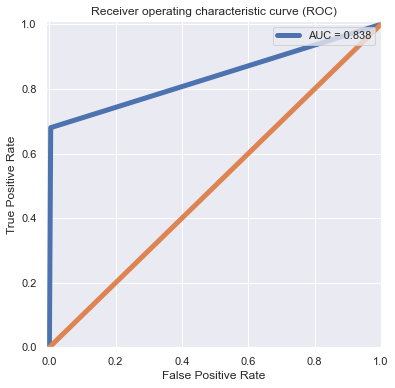

In [244]:
#ROC curve visualization for Random forest model using SMOTE
fpr, tpr, thresholds = roc_curve(y_test, rf_predicted_smote)
roc_auc = roc_auc_score(y_test, rf_predicted_smote)

# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

### We have to balance precision and Recall as to detect as many and precisied fraudulent transactions , therefore the best model we have got is with Random forest model on SMOTE data.

### Feature importance 

In [146]:
target = 'is_fraud'
feature = (['amt', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 
       'trans_time', 'age', 'trans_month_August', 'trans_month_December',
       'trans_month_February', 'trans_month_January', 'trans_month_July',
       'trans_month_June', 'trans_month_March', 'trans_month_May',
       'trans_month_November', 'trans_month_October', 'trans_month_September',
       'trans_day_Monday', 'trans_day_Saturday', 'trans_day_Sunday',
       'trans_day_Thursday', 'trans_day_Tuesday', 'trans_day_Wednesday'])

In [153]:
tmp = pd.DataFrame({'Feature': feature, 'Feature importance': model_xgb_smote.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
tmp.head(10)

,Feature,Feature importance
0,amt,0.334299
7,age,0.076768
11,trans_month_January,0.040291
1,zip,0.038782
2,lat,0.035688
3,long,0.033965
16,trans_month_November,0.031583
9,trans_month_December,0.030994
12,trans_month_July,0.029871
15,trans_month_May,0.028716


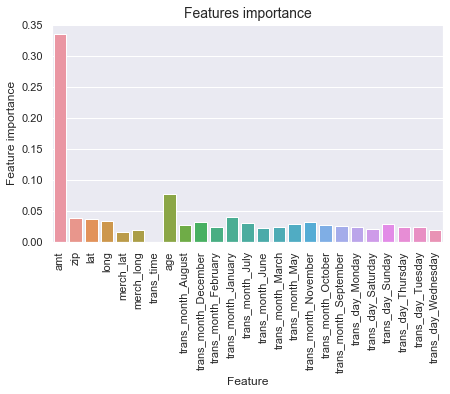

In [148]:
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

### Top 3 features are Amount, age and trans_January(highest no of transaction month ) able to explain the variation and can be used to detect fraud.